# ECON 407: Problem Set 2
<b>Professor Peifan Wu</b>

<b>Jack (Quan Cheng) Xie</b> <br>
Student #: 31091325

October 14, 2020

---

# Problem Set 2

Note: since all of you guys are using Python and Jupyter notebook, this problem set is to get yourselves more familiar with Python programming.

## Q1: Net Present Value

If an asset pays a stream of payoffs over multiple time periods, then we
can use a discount rate to calculate the value to the consumer of a entire
sequence of payoffs.

Most generally, we enumerate each discrete time period (e.g. year, month, day) by
the index $ t $ where today is $ t=0 $ and the asset lives for $ T $
periods, or infinite periods.

List the payoff at each time period as $ y_t $,  which we will assume, for
now, is known in advance.

Then if the discount factor is $ r \geq 0 $, the consumer “values” the
payoff $ y_t $ delivered at time $ t $ as $ \frac{1}{(1+r)^t}y_t $
where we note that if $ t=0 $, the value is just the current payoff
$ y_0 $.

Using this logic, we can write an expression for the value of the entire
sequence of payoffs with a sum.


$$
P_0 = \sum_{t=0}^T \left(\frac{1}{1 + r}\right)^t y_t
$$

For the rest of the example, we assume $r=0.01$.

In [1]:
r = 0.01 # discount rate

# bold string when print
bf = lambda string: '\033[1m'+string+'\033[0m'

### Q1.1
Suppose we have a stock that distributes 1 dollar dividend for every 3 periods (0, 3, 6, 9, ...) up to $T=500$, what's the NPV of it?

In [2]:
y_t = 1 # dividend payments
T = 500 # periods

δ = 1 # initialize discount factor
npv = 0 # initialize NPV

for t in range(T+1):
    
    if t%3 == 0: # payoff only every 3 seonds, starting from t=0
        npv += δ*y_t # add term to NPV
    
    δ *= (1 / (1+r)) # update discount factor
    
print(bf(f"NPV = {npv:.2f}."))

### Q1.2
Suppose we have a stock that distributes 1 dollar dividend for every even period (0, 2, 4, 6, ...) and distributes 0.8 dollar dividend for every odd period (1, 3, 5, 7, ...) up to $T=500$, what's the NPV of it?

In [3]:
y_0, y_1 = 1, 0.8 # dividend payments
T = 500 # periods

δ = 1 # initialize discount factor
npv = 0 # initialize NPV

for t in range(T+1):
    
    if t%2 == 0: # even seconds
        npv += δ*y_0 # add discounted payoff
    
    else: # odd seconds
        npv += δ*y_1 # add discounted payoff
        
    δ *= (1 / (1+r)) # update discount factor
    
print(bf(f"NPV = {npv:.2f}."))

### Q1.3
Suppose there's an investment possibility. We can choose 1) to invest 5 dollar for all $t=0,1,\ldots,100$, and receive 1 dollar for all $t = 101, 102, \ldots, 500$, or 2) just walk away. Which option should we choose? Should we take this opportunity?

In [4]:
y_0, y_1 = 5, 1 # dividend payments
T = 500 # periods

δ = 1 # initialize discount factor
npv = 0 # initialize NPV

for t in range(T+1):
    
    if t<=100: # first 100 seconds
        npv -= δ*y_0 # discounted investment
    
    else: # odd seconds
        npv += δ*y_1 # discounted payoff
        
    δ *= (1 / (1+r)) # update discount factor
    
print(bf(f"NPV = {npv:.2f}."))

if npv < 0:
    print('Negative NPV. Better to walk away 🚶‍♂️..')
elif npv > 0:
    print('Positive NPV. We should invest 🤑')
else:
    print('Zero NPV. Indifferent to investing 🤷‍♂️')

### Q1.4
Suppose we have a stock that distribute some dividend that geometrically decay with $\delta = 0.8$, i.e., it pays back 1 dollar at period 0, 0.8 dollar at period 1, 0.64 dollar at period 2, ... up to $T=500$, what's the NPV?

In [5]:
T = 500 # periods

δ = 1 # initialize discount factor
npv = 0 # initialize NPV

for t in range(T+1):
    
    npv += δ # add discounted payoff
    
    δ *= 0.8 # update discount factor
    
print(bf(f"NPV = {npv:.2f}."))

## Q2: Transition Dynamics of a Markov Process
We continue what we did in PS1, and think about a sudden, permanent change in the transition matrix. This can be treated as an exogenous policy change from the government.

The Markov matrix that we had in PS1 was

$$
P_1 = \left(\begin{array}{ccc}
1-\alpha-\beta & \alpha & \beta\\
\gamma & 1-\gamma & 0\\
\delta & \epsilon & 1-\delta-\epsilon
\end{array}\right)
$$

where $\alpha = 0.4, \beta = 0.1, \gamma = 0.2, \delta = 0.1, \epsilon = 0.001$. Now, we consider a government policy that's going to provide some funding for free job training classes, hence the probability that Unemployed become Employed would increase to $\alpha = 0.5$. However, to finance this policy, the government have to increase the tax rate of the firms, which increases job firing, and the probability that Employed guys become Unemployed is now $\gamma = 0.3$.

### Q2.1
Formulate the new transition matrix $P_2$ after the policy change.

In [6]:
import numpy as np

In [7]:
α = 0.5 # changed from 0.4
β = 0.1
γ = 0.3 # changed from 0.2
δ = 0.1
ϵ = 0.001

# new transition patrix
P_2 = np.array([
    [1-α-β, α, β],
    [γ, 1-γ, 0],
    [δ, ϵ , 1-δ-ϵ]
])

print(bf('P_2:'))
print(P_2)

P_2:
[[0.4   0.5   0.1  ]
 [0.3   0.7   0.   ]
 [0.1   0.001 0.899]]


### Q2.2
Compute the old stationary distribution and the new stationary distribution, denoted as $\psi_{1}$ and $\psi_{2}$. What do you find?

In [8]:
α = 0.4 # original
β = 0.1
γ = 0.2 # original
δ = 0.1
ϵ = 0.001

P_1 = np.array([
    [1-α-β, α, β],
    [γ, 1-γ, 0],
    [δ, ϵ , 1-δ-ϵ]
])

In [9]:
def sta_dist(P):
    '''
    returns stationary distribution of transition matrix P
    '''
    n = len(P) # dimension of transition matrix
    ψ_t = np.array([1/n]*n) # initialize distribution

    while True:

        ψ_prev = ψ_t.copy() # ψ_(t-1)
        ψ_t = ψ_t@P # update ψ_t

        if abs((ψ_t - ψ_prev)).sum()==0: # break if ψ_t == ψ_(t-1)
            break

    return ψ_t

def eig_sta_dist(P):
    '''
    returns stationary distribution with eigen vector method
    '''
    n = np.shape(P)
    w, v = np.linalg.eig(P.T) # compute eigen values and eigen vectors
    tmp = v[:, np.isclose(w, 1)][:, 0] # take eigen vector of eignvalue 1
    ψ_star = tmp / np.sum(tmp) # normalize vector so sums to 1

    return ψ_star

In [10]:
import pandas as pd

# label state spaces
state_space = {
    0:'P(U) Unemployed',
    1:'P(E) Employed',
    2:'P(D) Desperate'
}

ψ_1 = sta_dist(P_1)
ψ_2 = sta_dist(P_2)

df = pd.DataFrame({'ψ_1':ψ_1, 'ψ_2':ψ_2}, index=[state_space[i] for i in range(3)])
df['ψ_2 - ψ_1'] = df['ψ_2'] - df['ψ_1']
display(df)

,ψ_1,ψ_2,ψ_2 - ψ_1
P(U) Unemployed,0.250310,0.273219,0.022909
P(E) Employed,0.501859,0.456267,-0.045592
P(D) Desperate,0.247831,0.270514,0.022683


**Finding:** Probabilities of unemployment and becoming desperate become higher with the exogenous policy change that results in $\psi_2$.

### Q2.3
Assume the economy starts at the previous stationary distribution $\psi_{1}$. Time period is discrete and it starts from 0. Suppose the government policy takes place at period 4, i.e., the transitions between 0-1, 1-2, 2-3, 3-4 follow $P_{1}$, and the transition follows $P_{2}$ afterwards.

Plot the evolution of these three states for $t=1, 2, \ldots, 40$

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# label state spaces
state_space = {
    0:'(U)',
    1:'(E)',
    2:'(D)'
}

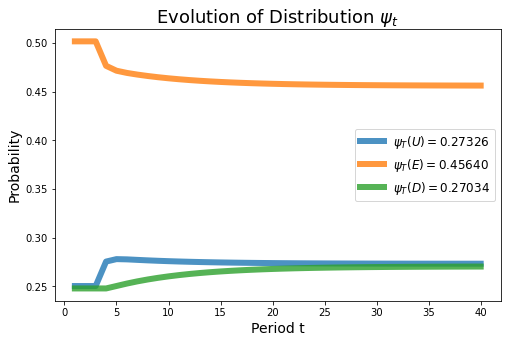

In [12]:
T = 40 # total periods

ψ0 = ψ_1 # initial distribution is stationary ψ_1

n = len(ψ0) # number of states
ψ = np.zeros((T+1, n)) # initialize record of distributions
ψ[0] = ψ0 # add initial distribution

for t in range(1, T+1):
    
    if t < 4: # before period 4
        ψ[t] = ψ[t-1] @ P_1 # update with old transition matrix P_1
        
    else: # after period 4
        ψ[t] = ψ[t-1] @ P_2 # update with new transition matrix P_2
          
# plot
plt.figure(figsize=(8, 5))

plt.plot(range(1, T+1), ψ[1:], lw=6, alpha=0.8)

plt.title('Evolution of Distribution $ψ_{t}$', fontsize=18)
plt.xlabel('Period t', fontsize=14)
plt.ylabel('Probability', fontsize=14)

plt.legend([
    f'$ψ_T{state_space[s]} = {ψ[-1, s]:.5f}$'
    for s in range(3)
], fontsize=12)

plt.show()